In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Netflix Userbase.csv")

In [3]:
df = data.copy()

In [4]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [6]:
# Converting the datatype of columns from object to datetime
df["Join Date"] = pd.DatetimeIndex(df["Join Date"])

df["Last Payment Date"] = pd.DatetimeIndex(df["Last Payment Date"])

In [7]:
df.info

<bound method DataFrame.info of       User ID Subscription Type  Monthly Revenue  Join Date Last Payment Date  \
0           1             Basic               10 2022-01-15        2023-10-06   
1           2           Premium               15 2021-05-09        2023-06-22   
2           3          Standard               12 2023-02-28        2023-06-27   
3           4          Standard               12 2022-10-07        2023-06-26   
4           5             Basic               10 2023-01-05        2023-06-28   
...       ...               ...              ...        ...               ...   
2495     2496           Premium               14 2022-07-25        2023-12-07   
2496     2497             Basic               15 2022-04-08        2023-07-14   
2497     2498          Standard               12 2022-09-08        2023-07-15   
2498     2499          Standard               13 2022-12-08        2023-12-07   
2499     2500             Basic               15 2022-08-13        2023-12-07

In [9]:
# can see that plan duration column has 1 month, here we can consider t convert all the values in month formt and to make it as numerical column.
df["Plan Duration"].value_counts()

Plan Duration
1 Month    2500
Name: count, dtype: int64

In [10]:
df.drop("Plan Duration", axis = 1, inplace = True)

In [11]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone


In [13]:
Total_Monthly_Revenue = df["Monthly Revenue"].sum()
print("Total Revenue",Total_Monthly_Revenue,"$")

Total Revenue 31271 $


### Total Revenue 31271 $

In [14]:
df.sort_values("Monthly Revenue", ascending=False)[["User ID", "Monthly Revenue"]].head(10)

,User ID,Monthly Revenue
2499,2500,15
2334,2335,15
2425,2426,15
2426,2427,15
379,380,15
1648,1649,15
1647,1648,15
1645,1646,15
954,955,15
959,960,15


In [19]:
# checking subscription type
df["Subscription Type"].value_counts()

Subscription Type
Basic       999
Standard    768
Premium     733
Name: count, dtype: int64

In [20]:
rev_sub_type = df.groupby("Subscription Type")["Monthly Revenue"].sum()

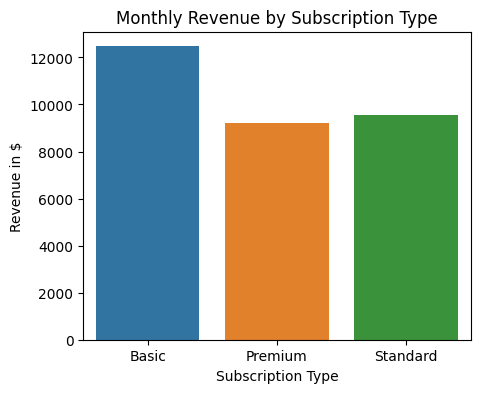

In [22]:
plt.figure(figsize=(5,4))
plt.title("Monthly Revenue by Subscription Type")
sns.barplot(x=rev_sub_type.index, y = rev_sub_type.values, hue = rev_sub_type.index, legend=False)
plt.ylabel("Revenue in $")
plt.show()

In [23]:
# Monthly revenue by country
rev_countries = df.groupby("Country")["Monthly Revenue"].sum()

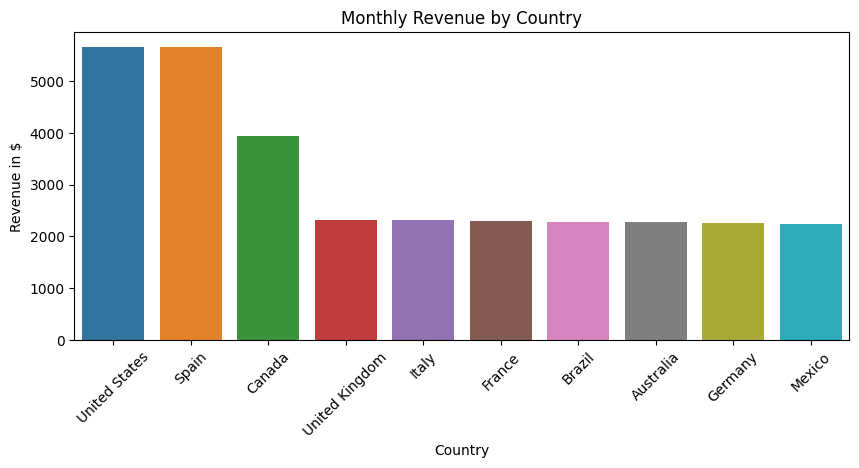

In [35]:
#sorting values in descending order
rev_countries = rev_countries.sort_values(ascending=False)

plt.figure(figsize=(10,4))
plt.title("Monthly Revenue by Country")
sns.barplot(x=rev_countries.index, y = rev_countries.values, hue = rev_countries.index, legend=False)
plt.ylabel("Revenue in $")
plt.xticks(rotation = 45)
plt.show()

In [38]:
# count of subscriber by age group
df["Age"].value_counts()

Age
39    116
30    116
28    115
31    115
41    114
47    111
37    107
35    105
29    104
40    103
42    102
48    101
46     99
36     99
49     97
43     94
33     93
51     93
32     92
45     89
38     89
34     88
27     87
44     86
50     84
26      1
Name: count, dtype: int64

In [40]:
df["Age"]= pd.cut(df["Age"], bins= 3, labels= ["25-34", "34-42", "42-5"])

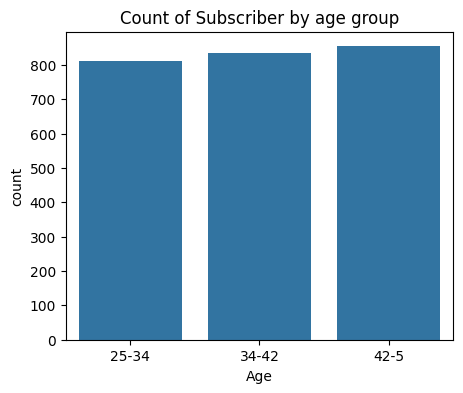

In [41]:
plt.figure(figsize=(5,4))
plt.title("Count of Subscriber by age group")
sns.countplot(x = df["Age"])
plt.show()

In [42]:
# Monthly revenue by age
Rev_age = df.groupby("Age")["Monthly Revenue"].sum()

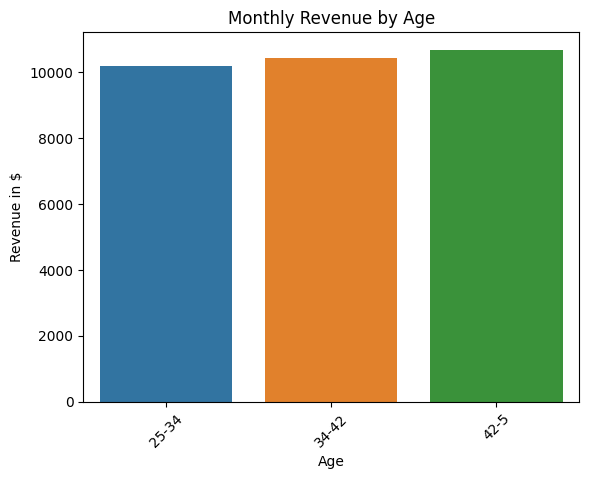

In [47]:
plt.title("Monthly Revenue by Age")
sns.barplot(x=Rev_age.index, y = Rev_age.values, hue = Rev_age.index, legend=False)
plt.ylabel("Revenue in $")
plt.xticks(rotation = 45)
plt.show()

In [46]:
# Monthly revenue by gender
df["Gender"].value_counts()

Gender
Female    1257
Male      1243
Name: count, dtype: int64

In [48]:
rev_gender = df.groupby("Gender")["Monthly Revenue"].sum()

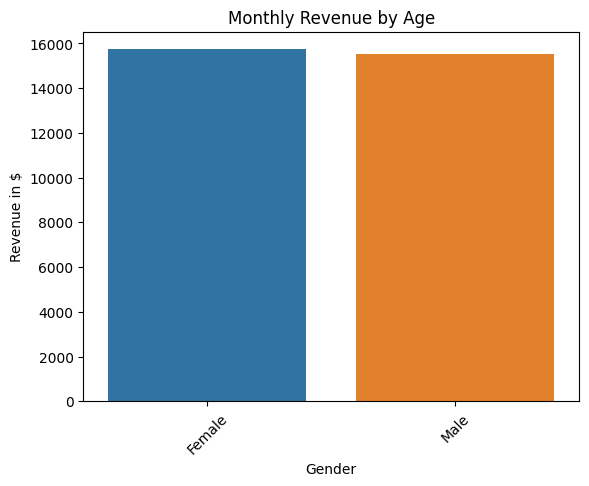

In [49]:
plt.title("Monthly Revenue by Age")
sns.barplot(x=rev_gender.index, y = rev_gender.values, hue = rev_gender.index, legend=False)
plt.ylabel("Revenue in $")
plt.xticks(rotation = 45)
plt.show()

In [50]:
# # Monthly revenue by device
df["Device"].value_counts()

Device
Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: count, dtype: int64

In [54]:
rev_device = df.groupby("Device")["Monthly Revenue"].sum()

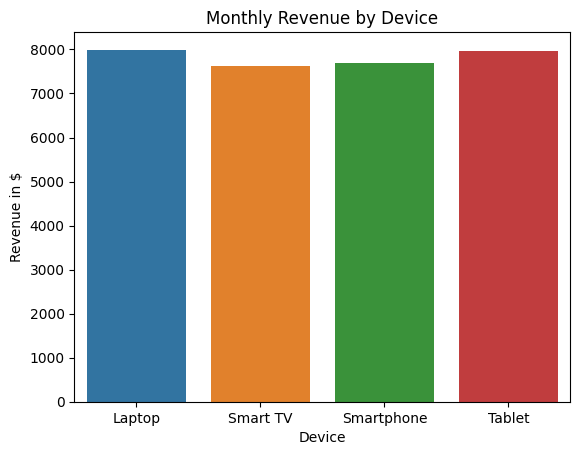

In [56]:
plt.title("Monthly Revenue by Device")
sns.barplot(x=rev_device.index, y = rev_device.values, hue = rev_device.index, legend=False)
plt.ylabel("Revenue in $")
plt.show()

In [57]:
# duration of months 
join_date= pd.to_datetime(df["Join Date"])
last_payment = pd.to_datetime(df["Last Payment Date"])

In [58]:
duration = last_payment - join_date

In [59]:
df["Duration"] = duration

In [60]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Duration
0,1,Basic,10,2022-01-15,2023-10-06,United States,25-34,Male,Smartphone,629 days
1,2,Premium,15,2021-05-09,2023-06-22,Canada,34-42,Female,Tablet,774 days
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,34-42,Male,Smart TV,119 days
3,4,Standard,12,2022-10-07,2023-06-26,Australia,42-5,Female,Laptop,262 days
4,5,Basic,10,2023-01-05,2023-06-28,Germany,25-34,Male,Smartphone,174 days


In [66]:
# converting duration into months
df["Duration_Month"] = df["Duration"].dt.days//30

In [67]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Duration,Duration_Month
0,1,Basic,10,2022-01-15,2023-10-06,United States,25-34,Male,Smartphone,629 days,20
1,2,Premium,15,2021-05-09,2023-06-22,Canada,34-42,Female,Tablet,774 days,25
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,34-42,Male,Smart TV,119 days,3
3,4,Standard,12,2022-10-07,2023-06-26,Australia,42-5,Female,Laptop,262 days,8
4,5,Basic,10,2023-01-05,2023-06-28,Germany,25-34,Male,Smartphone,174 days,5


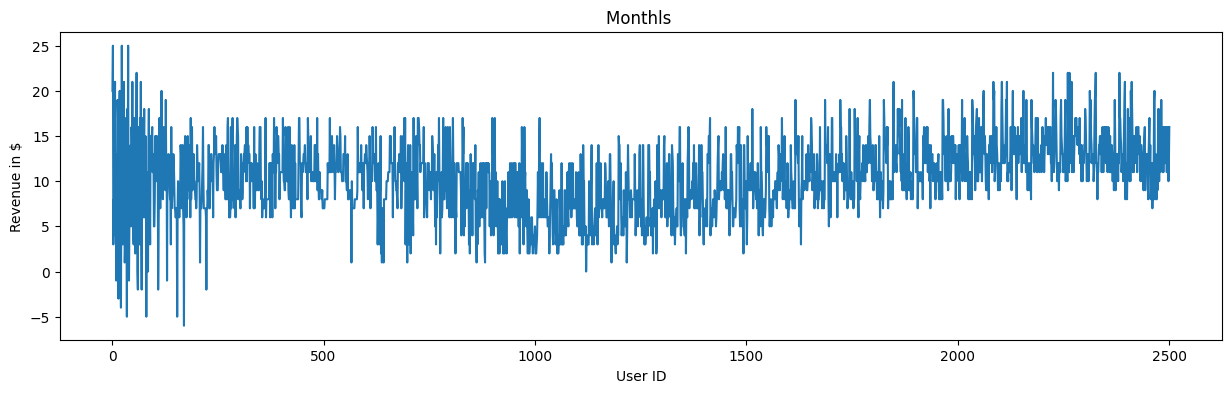

In [72]:
plt.figure(figsize= (15,4))
plt.title("Months ")
sns.lineplot(x= df["User ID"], y = df["Duration_Month"])
plt.ylabel("Revenue in $")
plt.show()

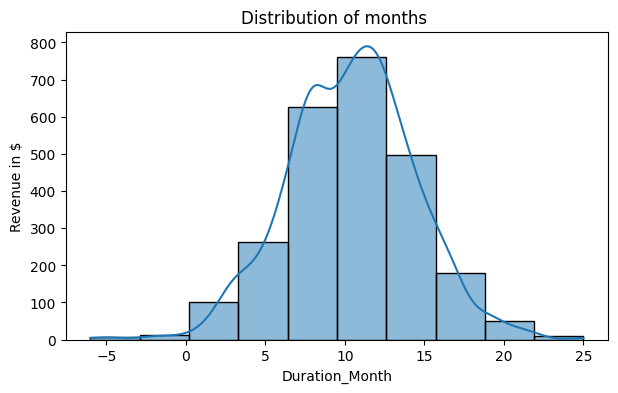

In [74]:
plt.figure(figsize= (7,4))
plt.title("Distribution of months ")
sns.histplot(df["Duration_Month"], bins = 10, kde = True)
plt.ylabel("Revenue in $")
plt.show()

In [81]:
# H0 -> Average customer churn duration is 10 months
# Ha -> Average customer churn duration is not 10 months

from scipy.stats import shapiro

stats, p = shapiro(df["Duration_Month"])

print("Shapiro statistical value = %.5f" %stats)
print("Shapiro p value = %.5f" %p)
alpha = 0.05

if p > alpha:
    print("Average customer churn duraton is 10 months - H0")
else:
    print("Average customer churn duraton is not 10 months - H0")

Shapiro statistical value = 0.99191
Shapiro p value = 0.00000
Average customer churn duraton is not 10 months - H0


In [83]:
pd.crosstab(df["Gender"], df["Subscription Type"])

Subscription Type,Basic,Premium,Standard
Gender,,,
Female,512,364,381
Male,487,369,387


In [85]:
pd.crosstab(df["Country"], df["Subscription Type"]).sort_values("Basic")

Subscription Type,Basic,Premium,Standard
Country,,,
United Kingdom,3,0,180
Mexico,4,0,179
Australia,31,101,51
France,36,147,0
Spain,110,212,129
Canada,145,88,84
Brazil,146,33,4
Germany,149,3,31
Italy,176,4,3


In [86]:
pd.crosstab(df["Device"], df["Subscription Type"])

Subscription Type,Basic,Premium,Standard
Device,,,
Laptop,259,192,185
Smart TV,238,188,184
Smartphone,251,171,199
Tablet,251,182,200
